# Model training

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [3]:
df = pd.read_csv("bfsi_cleaned_transactions.csv")
print("Data Shape:", df.shape)
print(df.head())

Data Shape: (20000, 18)
  transaction_id customer_id kyc_verified  account_age_days  \
0     TXN_200000    CUST_799          Yes              1050   
1     TXN_200001    CUST_484          Yes               295   
2     TXN_200002    CUST_791          Yes              2083   
3     TXN_200003    CUST_664          Yes              2789   
4     TXN_200004    CUST_157          Yes               694   

   transaction_amount  channel            timestamp  is_fraud  \
0            256369.0        0  2025-08-12 02:10:24         0   
1              6581.0        0  2025-08-25 01:14:31         0   
2              4492.0        0  2025-08-17 12:12:40         0   
3            275413.0        1  2025-08-07 06:23:54         0   
4             98098.0        1  2025-08-20 21:55:54         0   

   transaction_type  location  currency  avg_transaction_amount  \
0                 0         0         0                  122458   
1                 0         0         0                  147367   
2    

In [4]:
X = df.drop(columns=['transaction_id','customer_id','timestamp','is_fraud','kyc_verified'])
y = df['is_fraud']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=20, max_depth=5, class_weight="balanced", random_state=42
    )
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print("Accuracy:", round(acc*100,2), "%")
    print(classification_report(y_test, y_pred))
    results[name] = acc


Logistic Regression Results:
Accuracy: 51.8 %
              precision    recall  f1-score   support

           0       0.95      0.51      0.67      3763
           1       0.07      0.59      0.13       237

    accuracy                           0.52      4000
   macro avg       0.51      0.55      0.40      4000
weighted avg       0.90      0.52      0.64      4000


Decision Tree Results:
Accuracy: 94.08 %
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3763
           1       0.00      0.00      0.00       237

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.89      0.94      0.91      4000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Results:
Accuracy: 78.57 %
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      3763
           1       0.10      0.35      0.16       237

    accuracy                           0.79      4000
   macro avg       0.53      0.58      0.52      4000
weighted avg       0.90      0.79      0.83      4000



In [9]:
best_model_name = max(results, key=lambda x: results[x] if results[x] < 0.81 else -1)
best_model = models[best_model_name]
print(f"\n Saving best model: {best_model_name} (Accuracy {results[best_model_name]*100:.2f}%)")

joblib.dump(best_model, "fraud_detection_model.pkl")
joblib.dump(scaler, "scaler.pkl")


 Saving best model: Random Forest (Accuracy 78.57%)


['scaler.pkl']

# Model evaluation

In [10]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, accuracy_score

In [11]:
df = pd.read_csv("bfsi_cleaned_transactions.csv")

X = df.drop(columns=['transaction_id','customer_id','timestamp','is_fraud','kyc_verified'])
y = df['is_fraud']

In [12]:
model = joblib.load("fraud_detection_model.pkl")
scaler = joblib.load("scaler.pkl")

In [13]:
X_scaled = scaler.transform(X)

In [14]:
y_pred = model.predict(X_scaled)
print("Final Model Accuracy:", round(accuracy_score(y, y_pred)*100,2), "%")
print(classification_report(y, y_pred))

Final Model Accuracy: 80.03 %
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     18816
           1       0.13      0.42      0.20      1184

    accuracy                           0.80     20000
   macro avg       0.54      0.62      0.54     20000
weighted avg       0.91      0.80      0.85     20000



#  EDA Process — Exploratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set(style="whitegrid")

In [18]:
df = pd.read_csv("bfsi_cleaned_transactions.csv")
print("Data Shape:", df.shape)
print(df.head())


Data Shape: (20000, 18)
  transaction_id customer_id kyc_verified  account_age_days  \
0     TXN_200000    CUST_799          Yes              1050   
1     TXN_200001    CUST_484          Yes               295   
2     TXN_200002    CUST_791          Yes              2083   
3     TXN_200003    CUST_664          Yes              2789   
4     TXN_200004    CUST_157          Yes               694   

   transaction_amount  channel            timestamp  is_fraud  \
0            256369.0        0  2025-08-12 02:10:24         0   
1              6581.0        0  2025-08-25 01:14:31         0   
2              4492.0        0  2025-08-17 12:12:40         0   
3            275413.0        1  2025-08-07 06:23:54         0   
4             98098.0        1  2025-08-20 21:55:54         0   

   transaction_type  location  currency  avg_transaction_amount  \
0                 0         0         0                  122458   
1                 0         0         0                  147367   
2    

In [19]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistical Summary ---")
print(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          20000 non-null  object 
 1   customer_id             20000 non-null  object 
 2   kyc_verified            20000 non-null  object 
 3   account_age_days        20000 non-null  int64  
 4   transaction_amount      20000 non-null  float64
 5   channel                 20000 non-null  int64  
 6   timestamp               20000 non-null  object 
 7   is_fraud                20000 non-null  int64  
 8   transaction_type        20000 non-null  int64  
 9   location                20000 non-null  int64  
 10  currency                20000 non-null  int64  
 11  avg_transaction_amount  20000 non-null  int64  
 12  failed_login_attempts   20000 non-null  int64  
 13  multi_device_login      20000 non-null  int64  
 14  velocity_check  

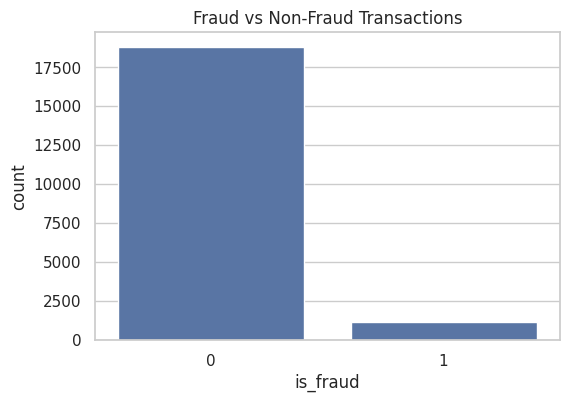


Fraud Ratio:
 is_fraud
0    0.9408
1    0.0592
Name: proportion, dtype: float64


In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()
fraud_ratio = df['is_fraud'].value_counts(normalize=True)
print("\nFraud Ratio:\n", fraud_ratio)

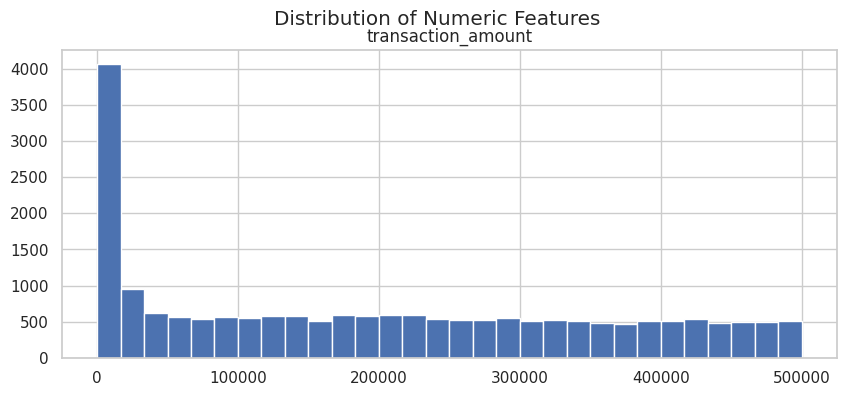

In [23]:
numeric_features = ['transaction_amount']  # Add other numeric columns if needed
df[numeric_features].hist(bins=30, figsize=(10,4))
plt.suptitle("Distribution of Numeric Features")
plt.show()

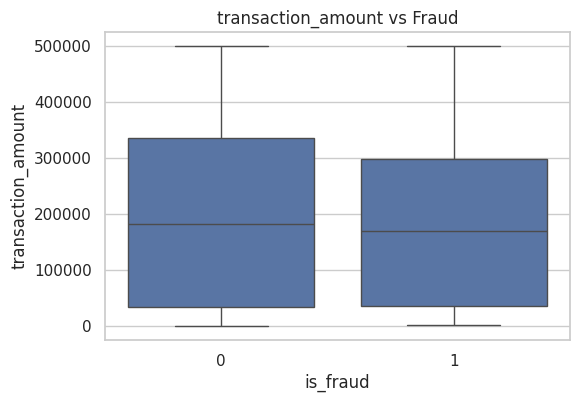

In [24]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_fraud', y=col, data=df)
    plt.title(f"{col} vs Fraud")
    plt.show()

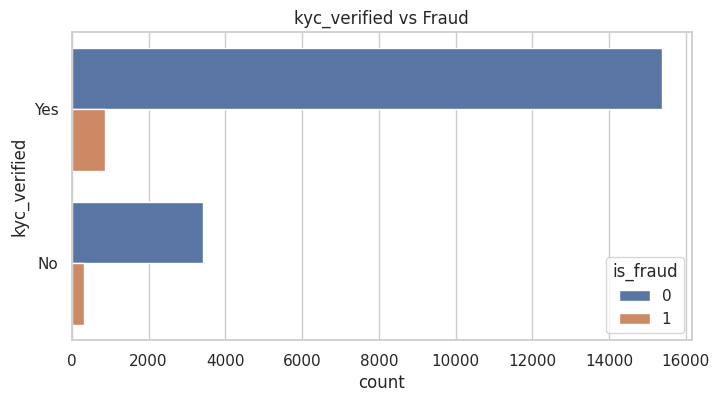

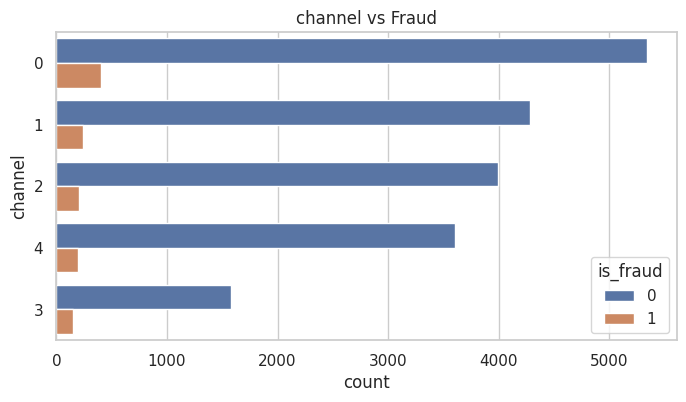

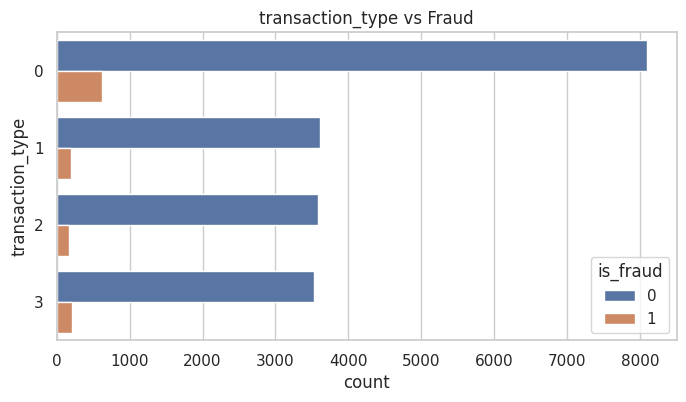

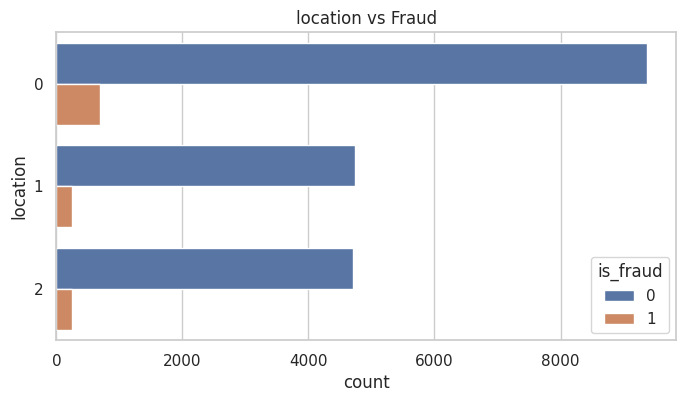

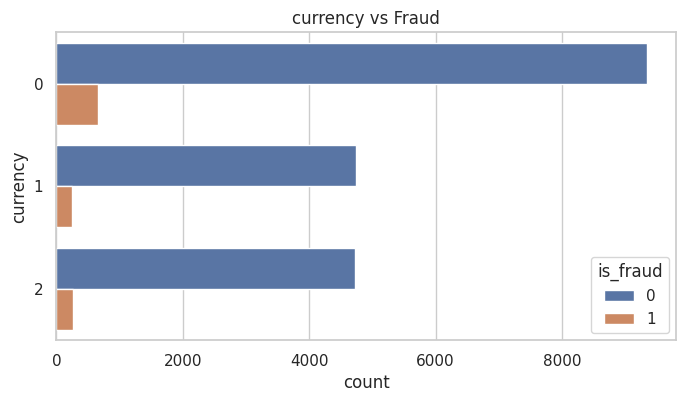

In [26]:
categorical_features = ['kyc_verified', 'channel', 'transaction_type', 'location', 'currency']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, hue='is_fraud', data=df, order=df[col].value_counts().index)
    plt.title(f"{col} vs Fraud")
    plt.show()

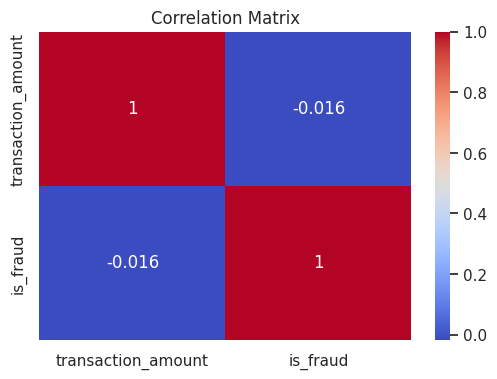

In [27]:
corr = df[numeric_features + ['is_fraud']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [28]:
print("\n--- Insights ---")
print("1. Fraud ratio indicates class imbalance; may need balancing.")
print("2. Numeric feature distributions and outliers can affect model performance.")
print("3. Categorical features show potential fraud patterns by device, location, merchant type.")
print("4. Correlation matrix helps identify features most related to 'is_fraud'.")



--- Insights ---
1. Fraud ratio indicates class imbalance; may need balancing.
2. Numeric feature distributions and outliers can affect model performance.
3. Categorical features show potential fraud patterns by device, location, merchant type.
4. Correlation matrix helps identify features most related to 'is_fraud'.
